In [41]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import cv2

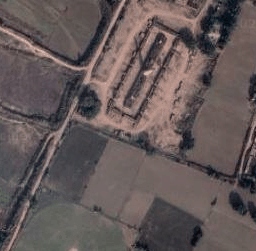

In [42]:
img_path = "/home/rishabh_mondal/brick_klins-1/india_bk/bk11.png"
# img_path1 = "/home/rishabh_mondal/brick_klins/india_bk/73.png"

display(Image(img_path))
# display(Image(img_path1))

In [43]:

base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    Flatten(),
    Dense(2048, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout_4 (Dropout)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 1)                 2049      
                                                      

In [44]:
# layer_name = "conv5_block3_out"

1/1 [==============================] - 1s 949ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


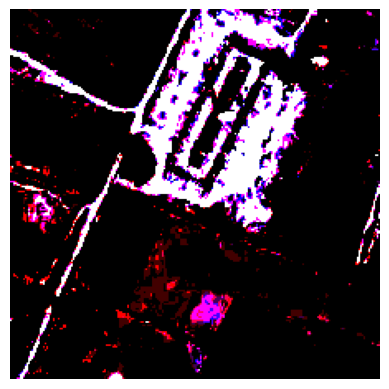

In [46]:
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
gap_output = model.get_layer('global_average_pooling2d_4').output
gap_model = Model(inputs=model.input, outputs=gap_output)

# Get predictions and feature maps
preds = model.predict(img_array)
feature_maps = gap_model.predict(img_array)

# Visualize the feature maps (heatmap)
heatmap = np.mean(feature_maps, axis=-1)  # Average along the channel axis
heatmap = np.maximum(heatmap, 0)  # Remove negative values
heatmap /= heatmap.max()  # Normalize

# Resize the heatmap to match the original image size
heatmap = cv2.resize(heatmap, (img.width, img.height))

# Apply a colormap for visualization
cmap = plt.cm.jet
heatmap = cmap(heatmap)[:, :, :3]

# Overlay the heatmap on the original image
superimposed_img = heatmap * 0.4 + img_array[0]

# Display the results
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()